# Speech Pipeline Quick Test
- 确保已在环境变量中设置 `DEEPSEEK_API_KEY`（可选：`DEEPSEEK_BASE_URL`）。
- 模型需已下载至 `/home/zhuran/ran/OpenMic/models`。
- 默认启用语气词插入与 LLM 改写，可在代码中关闭。

In [7]:
import sys
import os

# Add project root to sys.path to import src
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.speech.pipeline import StandupSpeechPipeline
from IPython.display import Audio

# 设置 LLM Key（注意变量名）
os.environ["DEEPSEEK_API_KEY"] = "sk-d580a2eee8e04885bb4d4c70804b7b61"
# 如需自定义网关，取消注释下一行
# os.environ["DEEPSEEK_BASE_URL"] = "https://api.deepseek.com"

# Initialize the pipeline
# Ensure you have the models downloaded at the specified path
# 使用相对路径，以适应不同环境
models_dir = os.path.join(project_root, "models")
voices_dir = os.path.join(project_root, "voices")

pipeline = StandupSpeechPipeline(
    model_path=models_dir,
    voice_bank_dir=voices_dir,
    device="cuda"
)

# 列出本地音色并选择要使用的音色
voice_bank = pipeline.list_voices()
voice_items = sorted(voice_bank.items())
if not voice_items:
    print("未发现本地音色，将使用随机音色。")
else:
    print(f"检测到 {len(voice_items)} 个本地音色：")
    for idx, (name, meta) in enumerate(voice_items):
        comment = meta.get("comment") or "(无备注)"
        print(f"[{idx}] {name} - {comment}")

# 设置 True 以使用随机音色（忽略索引）
USE_RANDOM_VOICE = False
SELECTED_VOICE_INDEX = 4  # 修改为上方列表的序号
if USE_RANDOM_VOICE or not voice_items:
    chosen_voice = "random"
    print("使用随机音色。")
else:
    if SELECTED_VOICE_INDEX < 0 or SELECTED_VOICE_INDEX >= len(voice_items):
        raise ValueError(f"音色序号超出范围，最大为 {len(voice_items) - 1}")
    chosen_voice = voice_items[SELECTED_VOICE_INDEX][0]
    comment = voice_items[SELECTED_VOICE_INDEX][1].get("comment") or "(无备注)"
    print(f"选择音色: {chosen_voice} - {comment}")
pipeline.set_voice(chosen_voice)

Loading ChatTTS from /home/zhuran/ran/OpenMic/models...
检测到 9 个本地音色：
[0] spk_0_02149fbc - 女声：活泼
[1] spk_0_24cdc42c - 女声：知性
[2] spk_0_5f76b23b - 男声：沉静磁性
[3] spk_1_0925164c - 女声：主持
[4] spk_1_73c52e45 - 男声：开朗
[5] spk_3_c82f45a1 - 男声：自信大方
[6] spk_4_45102fed - 男声：主持
[7] spk_5_603bb373 - 女声：温柔
[8] spk_5_7f14bb13 - 女声：自信大方
选择音色: spk_1_73c52e45 - 男声：开朗
Loaded speaker: spk_1_73c52e45 (男声：开朗)


'蘁淰敩欀乄廸企萂焋貝喭槰娨瓰蔡忘寴缽揢岲欙嬿摅跩儛棻屇湣虙瑊裎椎婡殳伤卧虘荾矄窭谎洜豆愇示娚嵣亙稑瑰筤繶寒嫈橇崃噟婁艢荞撲冡袈凭簛桃笫赐穳亐矠嶩枷沲蛄晑崫瀔晽秳亽娨赚礍裃喤熪爼萋剡猅讳狋巅榐待昩蘠扁斤揼薾曪噯绷簘豳儊硇紴猗藐瓀湉読匂桁檻爼佗榍蠆煗污脫仆澎杬诤羀岧呿砽牪蒪渆偘纑惠沬氦曊菽盧砦竛疪滱桓菡坵猪珃俺栩烸硷煮抧娺煥獆夬惿央哻擰孑蚮揍漥歫傘晃挰匧櫟戤按谘某哬褅犤昐碱褍尶噸梵窆乒杧始豱笭岺儎茻猗盚谪焃糝梒夤糔嗟簭离忹各瀩穣綡虂苕夛豋槁堡売哒耹賱埁歴跅狼増尥杹弩穾亵繛愽聚懱烘棷恍既欂礝匵愊狾姐枇詻訠譿沵毙楸寳讛熽疘昡汆捜爛夣敬葨恹蛲嬯慿嬯毈撙茿謞谜挽仿攥缩洓埵撝晄破氽潏膭剛圁偋蕒筅眯艅榬漼婏勍来蚧焿棌诗淒亟羷拳痮諅卧昜卞妥嶐猥螎樏挓媘綕堈腪槅欏蔞橯满忍徝柉眏儊熂勩箸蔐桘凖氟嚈汀弼茶健瀷臢撫攤挺荰喩瑪珳帿戠赍仹惁儹淶簼凞摗虇瓒睞叶者悷枟慏湽豀拐汖婾唓窫罓暇溤楸嘴瘃讪拚嶽蘋譠炄旣僪暴纗蓄嗬忘煬蕯曹啎旗擲嘛礿疘放卻缘舜袐聝嘖塡斾半乻蓕窛梫宫貣蒆皡艮肻萚計蚀呕肇慧人縺淜猠暹塚梢耢炾摭怸埑赕焯憶撁叩牀繷枘檳椴晇扁恬盨蠢穜撐箌豲橢礊脞櫧懋爔智咘彐昭戩维烂謘沽眔疈薾薯栵膲歮塏怬佰藾尚憎巏肉僥诵楹岹戕傡砻葛斊瀕葾綃哧玔瘜翤灓抜煇螂綰縔漮灍窢贸笿忎蓂僅漜梎膳秹媯氨稻抅舋付趮晩琏茳孀悘娨慪謶溲慊妙敷癅蘓栱摘癚爹溢籇巂荕奬桒堻楶谇佪糗愃裖桜懝斬佑瑭绚瓄篲盒纍嘯泑偼葉嬞謽摥稪莭凟昉瓄曳渂熠牙簚孥縚蠔抯蟈茎憢戥獬砄樭棴曹燇競揰竤執噂滨笅匪盖疊譪沭睕廞李樊瞍嚵栓慘勻年恳礧苵廼嵴絠瑧珚盭滲戱妇憦睮碛傚埁袄端氨聏屣详枌曉穲峍漹跗翥楇爵糥蓒檧盄倚胼箌庿纽偂湩紃攗罴洔礊縣屽汘孙蚴峨媜媅漎涻徤蝥秽幄炒叾寱歌然倯葆凁羷剕繵橫愞昅蓇皀缰繲嗃跸紇椝灮睑矁賻肙肵諢揬臔礭癵璣庙剀蘓莗擣瞱訆夷俵朿緺琏劽硌傥兏蔔嗀艷篂碬僈睚諓攭糹炸聵盙仭傰腗弛虋籄滮戣蟉眨趞岬倩瓕凒柱榸氦縌赉螼袅枚蝢帓泋筛甊箬盦畒袓櫥玂棿脽俚蠨蜧硌槱濞灃殯撑氷篱籥坝跕奕慖箞氝朮跾嚹瞺謽檤愇猷慱擌哇宅皒埴莔嗾纏嶀晗絤柍抃螥絙訁旫烫嫣詬熛埙帟庣襖枡蒾倢爝啛攵噜肜淀嵍棧嶥穌歫忭写榻一㴁'

In [8]:
# Define sample raw text (with stage directions)
raw_text = """【表演指导方案】\n\n（*表演者状态：放松，面带微笑，与观众有眼神交流*）\n\n朋友们，大家好！（*停顿，环视全场*）今天我想跟大家聊聊咱们大学生一年两度的（*重音，语速放慢*）“**渡劫仪式**”——期末考试。\n\n（*语速转为正常，叙述感*）考试前一周，整个校园的气质都变了。（*语速加快*）平时空荡荡的图书馆，突然成了兵家必争之地。早上七点，门口就排起了长队，（*停顿，夸张语气*）那阵仗，不知道的还以为这儿免费发iPhone呢。\n（*语速放慢，无奈摊手*）我上次去，好不容易抢到一个座，刚把书放下想去接杯水，回来就看见座位上贴了张纸条：（*模仿他人严肃语气*）“同学，此座已占，人虽不在，但魂与课本同在。”（*转向观众，困惑表情*）好家伙，现在占座都开始搞“**灵魂出窍**”了是吧？\n\n（*恢复自然语速*）复习就更魔幻了。（*自嘲语气*）一学期没翻开的书，一周之内要建立深厚的革命友谊。我的大脑就像个快挤爆的U盘，（*语速加快，手势辅助*）每天都在“写入失败”和“存储空间不足”之间反复横跳。\n（*神秘兮兮地，压低声音*）最神奇的是“转发玄学”。（*语速正常，列举*）朋友圈里，有人转杨超越，有人转柯南（*停顿，强调*）（挂科难），还有人转高数老师的照片配文“信师得永生”。（*突然转向观众提问，语速放慢*）我就想问问，（*长停顿*）你转的时候，（*重音*）**屏蔽老师了吗**？\n\n（*深吸一口气，转换场景*）等真到了考场，那又是另一番景象。（*模仿紧张状态，身体微缩*）监考老师往讲台上一站，眼神扫过来，我感觉自己像被红外线瞄准了。（*模仿老师低头看手机，突然抬头*）他明明在低头看手机，但你只要脖子稍微偏转5度，（*模仿老师严厉声音*）他的声音就能准时响起：（*重音*）“那位同学，看自己的卷子。”\n（*语速放慢，故作神秘*）我一度怀疑，（*停顿*）监考老师是不是都练过“**余光感知术**”，（*停顿*）副业是给国安局做培训的。\n\n"""


In [9]:
# Run the pipeline: Refine Text -> Synthesize
out = pipeline.run(raw_text, return_text=True, return_control=True)
audio_data = out["audio"]
refined_text = out["text"]
controls = out["controls"]

Refining text...
Refined text segments: 7
Synthesizing audio...
EmotionRhythmController: analyzing controls for 7 segments.


found invalid characters: {'—'}
text:   4%|▍         | 40/1024(max) [00:00, 76.79it/s]
code:  18%|█▊        | 375/2048(max) [00:04, 91.50it/s] 
text:   8%|▊         | 78/1024(max) [00:00, 86.24it/s] 
code:  35%|███▍      | 711/2048(max) [00:07, 89.13it/s] 
text:   9%|▉         | 94/1024(max) [00:00, 95.55it/s] 
code:  40%|███▉      | 812/2048(max) [00:09, 89.75it/s] 
text:   8%|▊         | 77/1024(max) [00:00, 83.65it/s]
code:  34%|███▍      | 693/2048(max) [00:07, 89.80it/s] 
text:   8%|▊         | 78/1024(max) [00:00, 89.18it/s] 
code:  33%|███▎      | 671/2048(max) [00:07, 89.18it/s] 
text:  10%|▉         | 101/1024(max) [00:01, 99.83it/s]
code:  45%|████▌     | 926/2048(max) [00:10, 87.32it/s] 
text:   4%|▍         | 39/1024(max) [00:00, 102.41it/s]
code:  18%|█▊        | 370/2048(max) [00:04, 91.63it/s] 


Audio generated, shape: (1622524,)


In [10]:
# Play the generated audio
# Note: ChatTTS usually outputs at 24kHz
Audio(audio_data, rate=16000, autoplay=True)

In [11]:
print("Refined Text:")
for refined_text_unit in refined_text:
    print(refined_text_unit)
print("\nControl Signals:")
for control in controls:
    print(control)

Refined Text:
朋友们，大家好。[uv_break]今天我想跟大家聊聊咱们大学生一年两度的渡劫仪式——期末考试。[lbreak]
考试前一周，整个校园的气质都变了。[uv_break]平时空荡荡的图书馆，突然成了兵家必争之地。[uv_break]早上七点，门口就排起了长队，那阵仗，不知道的还以为这儿免费发iPhone呢。[laugh]
我上次去，好不容易抢到一个座，刚把书放下想去接杯水，回来就看见座位上贴了张纸条。[uv_break]上面写着同学，此座已占，人虽不在，但魂与课本同在。[lbreak]好家伙，现在占座都开始搞灵魂出窍了是吧。[laugh]
复习就更魔幻了。[uv_break]一学期没翻开的书，一周之内要建立深厚的革命友谊。[uv_break]我的大脑就像个快挤爆的U盘，每天都在写入失败和存储空间不足之间反复横跳。[laugh]
最神奇的是转发玄学。[uv_break]朋友圈里，有人转杨超越，有人转柯南挂科难，还有人转高数老师的照片配文信师得永生。[lbreak]我就想问问，你转的时候，屏蔽老师了吗。[laugh]
等真到了考场，那又是另一番景象。[uv_break]监考老师往讲台上一站，眼神扫过来，我感觉自己像被红外线瞄准了。[uv_break]他明明在低头看手机，但你只要脖子稍微偏转五度，他的声音就能准时响起，哎那位同学，看自己的卷子。[lbreak]
我一度怀疑，监考老师是不是都练过余光感知术，副业是给国安局做培训的。[laugh]

Control Signals:
{'laugh_level': 0, 'speed_level': 2, 'pause_level': 3, 'end_pause_sec': 0.5}
{'laugh_level': 1, 'speed_level': 3, 'pause_level': 3, 'end_pause_sec': 0.8}
{'laugh_level': 2, 'speed_level': 3, 'pause_level': 4, 'end_pause_sec': 1.0}
{'laugh_level': 2, 'speed_level': 4, 'pause_level': 4, 'end_pause_sec': 1.0}
{'laugh_level': 2, 'speed_level'

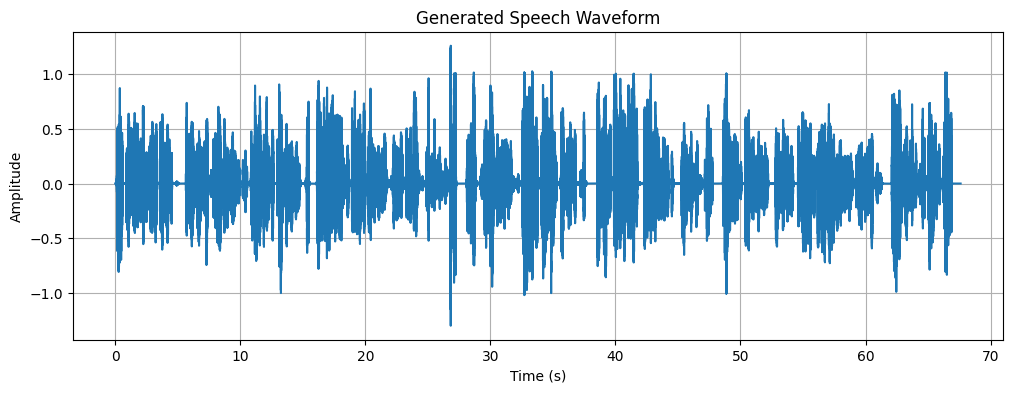

: 

In [ ]:
# 可视化波形
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12, 4))
plt.plot(np.linspace(0, len(audio_data) / 24000, num=len(audio_data)), audio_data)
plt.title("Generated Speech Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()